# Traffic Collision Data Analysis

# Objective

In this case study, you will be working on California Traffic Collision Data Analysis using Apache Spark, a powerful distributed computing framework designed for big data processing. This assignment aims to provide hands-on experience in analyzing large-scale traffic collision datasets using PySpark and AWS services. You will apply data analytics techniques to clean, transform, and explore crash data, drawing meaningful insights to support traffic safety and urban planning. Beyond understanding how big data tools optimize performance on a single machine and across clusters, you will develop a structured approach to analyzing crash trends, identifying high-risk locations, and evaluating contributing factors to traffic incidents. Additionally, you will utilize AWS S3 to store the processed data efficiently after the ETL process, enabling scalable storage and easy retrieval for further analysis.


# Business Value:

Traffic collisions pose significant risks to public safety, requiring continuous monitoring and analysis to enhance road safety measures. Government agencies, city planners, and policymakers must leverage data-driven insights to improve infrastructure, optimize traffic management, and implement preventive measures.

In this assignment, you will analyze California traffic collision data to uncover patterns related to accident severity, location-based risks, and key contributing factors. With Apache Spark's ability to handle large datasets efficiently and AWS S3's scalable storage, transportation authorities can process vast amounts of crash data in real time, enabling faster and more informed decision-making.

As an analyst examining traffic safety trends, your task is to analyze historical crash data to derive actionable insights that can drive policy improvements and safety interventions. Your analysis will help identify high-risk areas, categorize accidents by severity and contributing factors, and store the processed data in an AWS S3 bucket for scalable and long-term storage.

By leveraging big data analytics and cloud-based storage, urban planners and traffic authorities can enhance road safety strategies, reduce accident rates, and improve public transportation planning.


# Dataset Overview

The dataset used in this analysis consists of California traffic collision data obtained from the Statewide Integrated Traffic Records System (SWITRS). It includes detailed records of traffic incidents across California, covering various attributes such as location, severity, involved parties, and contributing factors. The dataset has been preprocessed and transformed using PySpark to facilitate large-scale analysis. By leveraging Apache Spark, we ensure efficient data handling, enabling deeper insights into traffic patterns, accident trends, and potential safety improvements.

The dataset is a .sqlite file contains detailed information about traffic collisions across California and is structured into four primary tables:
- `collisions` table contains information about the collision, where it happened, what vehicles were involved.

- `parties` table contains information about the groups people involved in the collision including age, sex, and sobriety.

- `victims` table contains information about the injuries of specific people involved in the collision.

- `locations` table contains information about the geographical location and details of road intersections.

# Assignment Tasks

<ol>
    <li>
        <strong>Data Preparation</strong></br>
        The dataset consists of structured tables containing traffic collision data. Before conducting any analysis, it is essential to ensure that the data is properly formatted and structured for efficient processing.</br>
        Check for data consistency and ensure all columns are correctly formatted.</br>
        Apply sampling techniques if needed to extract a representative subset for analysis.</br>
        Structure and prepare the data for further processing and analysis.</br>
    </br>
    <li>
        <strong>Data Cleaning</strong></br>
            2.1 <strong>Fixing Columns:</strong> Ensure all columns are properly named and formatted.</br>
            2.2 <strong>Handling Missing Values:</strong> Decide on an approach to handle missing data (e.g., imputation or removal). Mention the approach in your report.</br>
            2.3 <strong>Handling Outliers:</strong> Identify outliers in the dataset and explain why they are considered outliers. It is not necessary to remove them for this task, but mention your approach for handling them.</br>
    </br>
    <li>
        <strong>Exploratory Data Analysis</strong></br>
        Finding Patterns and analyze the dataset and find patterns based on the following points:
                <ul>
                3.1 Classify variables into categorical and numerical types.</br>
                3.2 Analyze the distribution of collision severity.</br>
                3.3 Examine weather conditions during collisions.</br>
                3.4 Analyze the distribution of victim ages.</br>
                3.5 Study the relationship between collision severity and the number of victims.</br>
                3.6 Analyze the correlation between weather conditions and collision severity.</br>
                3.7 Visualize the impact of lighting conditions on collision severity.</br>
                3.8 Extract and analyze weekday-wise collision trends.</br>
                3.9 Assess the number of collisions occurring on different days of the week.</br>
                3.10 Study spatial distribution of collisions by county.</br>
                3.11 Generate a scatter plot to analyze collision locations geographically.</br>
                3.12 Extract and analyze collision trends over time, including yearly, monthly, and hourly trends.</br>
</ul>
</br>
<li>
<strong>ETL Querying</strong><br>
Write PySpark SQL queries for the following:</br>
<ol>
    4.1. Load the processed dataset as CSV files in S3 bucket.</br>
    4.2. Identify the top 5 counties with the highest number of collisions.</br>
    4.3. Identify the month with the highest number of collisions.</br>
    4.4. Determine the most common weather condition during collisions.</br>
    4.5. Calculate the percentage of collisions that resulted in fatalities.</br>
    4.6. Find the most dangerous time of day for collisions.</br>
    4.7. Identify the top 5 road surface conditions with the highest collision frequency.</br>
    4.8. Analyze lighting conditions that contribute to the highest number of collisions.</br>
</ol>
</br>
<li>
<strong>Conclusion</strong></br>
Provide final insights and recommendations based on the analysis:
    <ul>
        5.1 Recommendations to improve road safety by identifying high-risk locations and peak accident times for infrastructure improvements.</br>
        5.2 Suggestions to optimize traffic management by analyzing trends in collision severity, weather conditions, and lighting to improve road design and traffic signal timing.</br>
        5.3 Propose data-driven policy changes to enhance pedestrian and cyclist safety based on collision trends involving vulnerable road users.</br>
        5.4 Identify potential high-risk zones for proactive intervention by examining geographic collision density and historical accident data.</br>
        5.5 Assess the impact of environmental factors such as weather, road surface conditions, and lighting on accident frequency and severity.</br>
        5.6 Develop predictive models to anticipate collision hotspots and support proactive safety measures.</br>
        </ul>
        Conclude the analysis by summarizing key findings and business implications.</br>
        Explain the results of univariate, segmented univariate, and bivariate analyses in real-world traffic safety and policy terms.</br>
        Include visualizations and summarize the most important results in the report. Insights should explain why each variable is important and how they can influence traffic safety policies and urban planning.</br>
        </ul>
        </br>
    <li>
    <strong>Visualization Integration [Optional]</strong>
    <p>Enhance the project by incorporating a visualization component that connects the processed data stored in an S3 bucket to a business intelligence tool such as Tableau or Power BI. This involves setting up the connection between the S3 bucket and the chosen visualization tool, importing the processed dataset for analysis and visualization, creating interactive dashboards to explore key trends and insights and ensuring data updates are reflected dynamically in the visualization tool.<br>
</br>
</ol>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Install Required Libraries

In [2]:
## Install the required libraries
!pip install --quiet pyspark==3.5.4 pandas==2.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
# Import the necessary libraries
import sqlite3
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, to_date

#**1. Data Preparation** <font color = red>[5 marks]</font> <br>

The dataset consists of structured tables containing traffic collision data.

Before conducting any analysis, it is essential to ensure that the data is properly formatted and structured for efficient processing.

Check for data consistency and ensure all columns are correctly formatted.

In [14]:
# Write code to load the data and check the schema
import pandas as pd

path_case_ids   = '/content/drive/MyDrive/Learning/UGR1124/crash-data-analysis-dataset/sample_case_ids.csv'
path_collisions = '/content/drive/MyDrive/Learning/UGR1124/crash-data-analysis-dataset/sample_collisions.csv'
path_parties    = '/content/drive/MyDrive/Learning/UGR1124/crash-data-analysis-dataset/sample_parties.csv'
path_victims    = '/content/drive/MyDrive/Learning/UGR1124/crash-data-analysis-dataset/sample_victims.csv'

#**2. Data Cleaning** <font color = red>[20 marks]</font> <br>


In [15]:
#Display Schema & Sample Data
df_case_ids   = pd.read_csv(path_case_ids)
df_collisions = pd.read_csv(path_collisions)
df_parties    = pd.read_csv(path_parties)
df_victims    = pd.read_csv(path_victims)

print("\n=== Case IDs ===")
print(df_case_ids.info())
print(df_case_ids.head())

print("=== Collisions ===")
print(df_collisions.info())
print(df_collisions.head())

print("\n=== Parties ===")
print(df_parties.info())
print(df_parties.head())

print("\n=== Victims ===")
print(df_victims.info())
print(df_victims.head())


=== Case IDs ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942433 entries, 0 to 942432
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   case_id  942433 non-null  float64
 1   db_year  942433 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 14.4 MB
None
      case_id  db_year
0  90017156.0     2021
1   4078685.0     2021
2  90588783.0     2021
3   3351919.0     2018
4    632208.0     2018
=== Collisions ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935791 entries, 0 to 935790
Data columns (total 65 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   case_id                          935791 non-null  float64
 1   jurisdiction                     934633 non-null  float64
 2   officer_id                       933527 non-null  object 
 3   reporting_district               383138 non-null  object 
 4   chp_shift

##**2.1 Missing Values** <font color = red>[10 marks]</font> <br>


In [17]:
#Check for Missing Values
print("=== Collisions Missing Values ===")
print(df_collisions.isna().sum())
print("\nMissing value rate:")
print((df_collisions.isna().mean()*100).round(2))

print("\n=== Parties Missing Values ===")
print(df_parties.isna().sum())
print("\nMissing value rate:")
print((df_parties.isna().mean()*100).round(2))

print("\n=== Victims Missing Values ===")
print(df_victims.isna().sum())
print("\nMissing value rate:")
print((df_victims.isna().mean()*100).round(2))

print("\n=== Case IDs Missing Values ===")
print(df_case_ids.isna().sum())
print("\nMissing value rate:")
print((df_case_ids.isna().mean()*100).round(2))

=== Collisions Missing Values ===
case_id                    0
jurisdiction            1158
officer_id              2264
reporting_district    552653
chp_shift                  0
                       ...  
latitude              669049
longitude             669049
collision_date             0
collision_time          8084
process_date               0
Length: 65, dtype: int64

Missing value rate:
case_id                0.00
jurisdiction           0.12
officer_id             0.24
reporting_district    59.06
chp_shift              0.00
                      ...  
latitude              71.50
longitude             71.50
collision_date         0.00
collision_time         0.86
process_date           0.00
Length: 65, dtype: float64

=== Parties Missing Values ===
id                                   0
case_id                              0
party_number                         0
party_type                        4395
at_fault                             0
party_sex                       249269


In [18]:
#Drop Sparse Columns
threshold = 0.8

def drop_sparse(df, name):
    missing_ratio = df.isna().mean()
    sparse_cols = missing_ratio[missing_ratio > threshold].index.tolist()
    print(f"\n=== {name} ===")
    print("Sparse columns to drop:", sparse_cols)
    df_clean = df.drop(columns=sparse_cols)
    return df_clean

df_collisions_clean = drop_sparse(df_collisions, "Collisions")
df_parties_clean    = drop_sparse(df_parties, "Parties")
df_victims_clean    = drop_sparse(df_victims, "Victims")
df_case_ids_clean   = drop_sparse(df_case_ids, "Case IDs")


=== Collisions ===
Sparse columns to drop: []

=== Parties ===
Sparse columns to drop: []

=== Victims ===
Sparse columns to drop: []

=== Case IDs ===
Sparse columns to drop: []


In [54]:
# 2.4 Data Type Conversion
import pandas as pd

if 'collision_date' in df_collisions.columns:
    df_collisions['collision_date'] = pd.to_datetime(
        df_collisions['collision_date'], errors='coerce'
    )

if 'process_date' in df_collisions.columns:
    df_collisions['process_date'] = pd.to_datetime(
        df_collisions['process_date'], errors='coerce'
    )

if 'collision_time' in df_collisions.columns:
    df_collisions['collision_time'] = pd.to_datetime(
        df_collisions['collision_time'], format='%H:%M:%S', errors='coerce'
    ).dt.time

if 'collision_severity' in df_collisions.columns:
    if df_collisions['collision_severity'].str.isnumeric().any():
        df_collisions['collision_severity'] = pd.to_numeric(
            df_collisions['collision_severity'], errors='coerce'
        )
    else:
        severity_map = {
            "Fatal": 1,
            "Severe Injury": 2,
            "Other Visible Injury": 3,
            "Complaint of Pain": 4,
            "Property Damage Only": 0
        }
        df_collisions['collision_severity'] = df_collisions['collision_severity'].map(severity_map)

if 'killed_victims' in df_collisions.columns:
    df_collisions['killed_victims'] = pd.to_numeric(df_collisions['killed_victims'], errors='coerce')

if 'injured_victims' in df_collisions.columns:
    df_collisions['injured_victims'] = pd.to_numeric(df_collisions['injured_victims'], errors='coerce')

if 'killed_victims' in df_collisions.columns and 'injured_victims' in df_collisions.columns:
    df_collisions['total_victims'] = (
        df_collisions['killed_victims'].fillna(0) + df_collisions['injured_victims'].fillna(0)
    )

categorical_cols = ['weather_1', 'lighting', 'road_surface', 'county_location']
for col in categorical_cols:
    if col in df_collisions.columns:
        df_collisions[col] = df_collisions[col].astype('category')

for df in [df_collisions, df_case_ids, df_parties, df_victims]:
    if 'case_id' in df.columns:
        df['case_id'] = df['case_id'].astype(str).str.replace('.0', '', regex=False)

print("\n=== Collisions Data Types After Conversion ===")
print(df_collisions.info())


=== Collisions Data Types After Conversion ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935791 entries, 0 to 935790
Data columns (total 66 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   case_id                          935791 non-null  object        
 1   collision_date                   935791 non-null  datetime64[ns]
 2   collision_time                   0 non-null       datetime64[ns]
 3   processed_on                     935791 non-null  datetime64[ns]
 4   severity                         0 non-null       float64       
 5   fatalities                       935791 non-null  float64       
 6   injuries                         935791 non-null  float64       
 7   latitude                         935791 non-null  float64       
 8   longitude                        935791 non-null  float64       
 9   jurisdiction                     935791 non-null  float64       
 

In [56]:
#Handle Missing Values
def handle_missing(df, name):
    print(f"\n=== {name} ===")
    print("Before data cleaning:", df.isna().sum().sum(), "missing values")

    for col in df.select_dtypes(include=['datetime64[ns]']).columns:
        df[col] = df[col].fillna(df[col].median())

    for col in df.select_dtypes(include=['int64','float64']).columns:
        df[col] = df[col].fillna(df[col].median())

    for col in df.select_dtypes(include=['object','category']).columns:
        if df[col].isna().sum() > 0:
            df[col] = df[col].fillna(df[col].mode()[0])

    print("After data cleaning:", df.isna().sum().sum(), "missing values")
    return df

df_collisions = handle_missing(df_collisions, "Collisions")
df_parties    = handle_missing(df_parties, "Parties")
df_victims    = handle_missing(df_victims, "Victims")
df_case_ids   = handle_missing(df_case_ids, "Case IDs")


=== Collisions ===
Before data cleaning: 2162206 missing values


/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


After data cleaning: 1871582 missing values

=== Parties ===
Before data cleaning: 0 missing values
After data cleaning: 0 missing values

=== Victims ===
Before data cleaning: 0 missing values
After data cleaning: 0 missing values

=== Case IDs ===
Before data cleaning: 0 missing values
After data cleaning: 0 missing values


##**2.2 Fixing Columns** <font color = red>[5 marks]</font> <br>


In [21]:
#Remove Duplicates
def remove_duplicates(df, name):
    print(f"\n=== {name} ===")
    before = df.shape[0]
    df_clean = df.drop_duplicates()
    after = df_clean.shape[0]
    print(f"Number of rows before removing duplicates: {before}")
    print(f"Number of rows after removing duplicates:  {after}")
    print(f"Number of rows removed:                    {before - after}")
    return df_clean

df_collisions = remove_duplicates(df_collisions, "Collisions")
df_parties    = remove_duplicates(df_parties, "Parties")
df_victims    = remove_duplicates(df_victims, "Victims")
df_case_ids   = remove_duplicates(df_case_ids, "Case IDs")


=== Collisions ===
Number of rows before removing duplicates: 935791
Number of rows after removing duplicates:  935791
Number of rows removed:                    0

=== Parties ===
Number of rows before removing duplicates: 1866917
Number of rows after removing duplicates:  1866917
Number of rows removed:                    0

=== Victims ===
Number of rows before removing duplicates: 963933
Number of rows after removing duplicates:  963933
Number of rows removed:                    0

=== Case IDs ===
Number of rows before removing duplicates: 942433
Number of rows after removing duplicates:  942388
Number of rows removed:                    45


In [24]:
#Detect Outliers using IQR
def detect_outliers_iqr(df, cols):
    results = {}
    for col in cols:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

            results[col] = {
                "Q1": Q1,
                "Q3": Q3,
                "IQR": IQR,
                "Lower Bound": lower_bound,
                "Upper Bound": upper_bound,
                "Outlier Count": outliers.shape[0]
            }
    return pd.DataFrame(results).T

outlier_report = detect_outliers_iqr(df_collisions, numeric_cols)
print(outlier_report)

# List of numerical columns to check for outliers
numeric_cols = [
    'population', 'distance', 'beat_number', 'collision_severity',
    'killed_victims', 'injured_victims', 'party_count',
    'severe_injury_count', 'other_visible_injury_count',
    'complaint_of_pain_injury_count', 'pedestrian_killed_count',
    'pedestrian_injured_count', 'bicyclist_killed_count',
    'bicyclist_injured_count', 'motorcyclist_killed_count',
    'motorcyclist_injured_count', 'latitude', 'longitude'
]

print("Numerical columns to check:", numeric_cols)

Empty DataFrame
Columns: []
Index: []
Numerical columns to check: ['population', 'distance', 'beat_number', 'collision_severity', 'killed_victims', 'injured_victims', 'party_count', 'severe_injury_count', 'other_visible_injury_count', 'complaint_of_pain_injury_count', 'pedestrian_killed_count', 'pedestrian_injured_count', 'bicyclist_killed_count', 'bicyclist_injured_count', 'motorcyclist_killed_count', 'motorcyclist_injured_count', 'latitude', 'longitude']


##**2.3 Outlier Analysis** <font color = red>[5 marks]</font> <br>


In [26]:
print(df_collisions.dtypes)


case_id                      float64
jurisdiction                 float64
officer_id                    object
reporting_district            object
chp_shift                     object
                           ...      
latitude                     float64
longitude                    float64
collision_date        datetime64[ns]
collision_time                object
process_date                  object
Length: 65, dtype: object


In [27]:
#Remove Outliers
for col in ['reporting_district', 'beat_number']:
    if col in df_collisions.columns:
        df_collisions[col] = pd.to_numeric(df_collisions[col], errors='coerce')

if 'collision_time' in df_collisions.columns:
    df_collisions['collision_time'] = pd.to_datetime(
        df_collisions['collision_time'], errors='coerce'
    ).dt.time

if 'process_date' in df_collisions.columns:
    df_collisions['process_date'] = pd.to_datetime(
        df_collisions['process_date'], errors='coerce'
    )

categorical_cols = ['weather_1', 'lighting', 'road_surface']
for col in categorical_cols:
    if col in df_collisions.columns:
        df_collisions[col] = df_collisions[col].astype('category')

def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        if col in df_clean.columns and pd.api.types.is_numeric_dtype(df_clean[col]):
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            before = df_clean.shape[0]
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
            after = df_clean.shape[0]

            print(f"{col}: removed {before - after} outliers")
    return df_clean

numeric_cols = df_collisions.select_dtypes(include=['int64','float64']).columns.tolist()

df_collisions_no_outliers = remove_outliers_iqr(df_collisions, numeric_cols)

print("\nShape before:", df_collisions.shape)
print("Shape after :", df_collisions_no_outliers.shape)

case_id: removed 185332 outliers
jurisdiction: removed 0 outliers
reporting_district: removed 233906 outliers
county_city_location: removed 0 outliers
special_condition: removed 2486 outliers
beat_number: removed 121435 outliers
distance: removed 50604 outliers
intersection: removed 80662 outliers
state_highway_indicator: removed 0 outliers
caltrans_district: removed 82822 outliers
state_route: removed 33592 outliers
postmile: removed 0 outliers
tow_away: removed 0 outliers
killed_victims: removed 0 outliers
injured_victims: removed 3177 outliers
party_count: removed 45654 outliers
pcf_violation: removed 421 outliers
chp_road_type: removed 0 outliers
pedestrian_collision: removed 4253 outliers
bicycle_collision: removed 4295 outliers
motorcycle_collision: removed 2200 outliers
truck_collision: removed 3823 outliers
not_private_property: removed 0 outliers
severe_injury_count: removed 337 outliers
other_visible_injury_count: removed 4012 outliers
complaint_of_pain_injury_count: removed 

#**3. Exploratory Data Analysis** <font color = red>[65 marks]</font> <br>


##**3.1.1. Data Preparation** <font color = red>[5 marks]</font> <br>

Q: Classify variables into categorical and numerical.

In [28]:
# Encode Categorical Variables
categorical_cols = df_collisions.select_dtypes(include=['object','category']).columns.tolist()
numerical_cols   = df_collisions.select_dtypes(include=['int64','float64']).columns.tolist()

print("Categorical Variables:", categorical_cols)
print("Numerical Variables:", numerical_cols)

# String Indexing for Categorical Columns
from sklearn.preprocessing import LabelEncoder

df_encoded = df_collisions.copy()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

print(df_encoded[categorical_cols].head())

Categorical Variables: ['officer_id', 'chp_shift', 'population', 'county_location', 'beat_type', 'chp_beat_type', 'chp_beat_class', 'primary_road', 'secondary_road', 'direction', 'weather_1', 'caltrans_county', 'location_type', 'side_of_highway', 'collision_severity', 'primary_collision_factor', 'pcf_violation_category', 'pcf_violation_subsection', 'hit_and_run', 'type_of_collision', 'motor_vehicle_involved_with', 'pedestrian_action', 'road_surface', 'road_condition_1', 'lighting', 'control_device', 'statewide_vehicle_type_at_fault', 'chp_vehicle_type_at_fault']
Numerical Variables: ['case_id', 'jurisdiction', 'reporting_district', 'county_city_location', 'special_condition', 'beat_number', 'distance', 'intersection', 'state_highway_indicator', 'caltrans_district', 'state_route', 'postmile', 'tow_away', 'killed_victims', 'injured_victims', 'party_count', 'pcf_violation', 'chp_road_type', 'pedestrian_collision', 'bicycle_collision', 'motorcycle_collision', 'truck_collision', 'not_privat

In [29]:
# Reordering & Renaming Columns
new_order = [
    'case_id', 'collision_date', 'collision_time', 'process_date',
    'collision_severity', 'killed_victims', 'injured_victims',
    'latitude', 'longitude'
] + [col for col in df_collisions.columns if col not in [
    'case_id','collision_date','collision_time','process_date',
    'collision_severity','killed_victims','injured_victims',
    'latitude','longitude'
]]

df_collisions = df_collisions[new_order]

print(df_collisions.head())

df_collisions = df_collisions.rename(columns={
    'collision_severity': 'severity',
    'killed_victims': 'fatalities',
    'injured_victims': 'injuries',
    'process_date': 'processed_on'
})

print(df_collisions.columns.tolist())

      case_id collision_date collision_time process_date  \
0   8000993.0     2016-03-20            NaT   2016-03-30   
1   4232117.0     2009-04-13            NaT   2009-11-30   
2  91389627.0     2021-01-09            NaT   2021-01-18   
3   3589817.0     2007-06-16            NaT   2008-03-11   
4   9111695.0     2020-04-14            NaT   2020-08-03   

     collision_severity  killed_victims  injured_victims  latitude  \
0  property damage only             0.0              0.0  34.33866   
1          other injury             0.0              1.0  34.33866   
2                  pain             0.0              1.0  39.12512   
3  property damage only             0.0              0.0  34.33866   
4  property damage only             0.0              0.0  34.33866   

    longitude  jurisdiction  ...                chp_vehicle_type_at_fault  \
0 -118.533065        1942.0  ...  unknown hit and run vehicle involvement   
1 -118.533065        3008.0  ...                         pickups

In [30]:
# Final cleaned data
final_df = df_collisions_no_outliers.copy()

print("=== Final Cleaned Data ===")
print(final_df.info())
print(final_df.head())

=== Final Cleaned Data ===
<class 'pandas.core.frame.DataFrame'>
Index: 51606 entries, 31 to 935757
Data columns (total 65 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   case_id                          51606 non-null  float64       
 1   jurisdiction                     51606 non-null  float64       
 2   officer_id                       51606 non-null  object        
 3   reporting_district               51606 non-null  float64       
 4   chp_shift                        51606 non-null  object        
 5   population                       51606 non-null  object        
 6   county_city_location             51606 non-null  int64         
 7   county_location                  51606 non-null  object        
 8   special_condition                51606 non-null  float64       
 9   beat_type                        51606 non-null  object        
 10  chp_beat_type                    5

Loading the Final Cleaned Dataset into S3 Bucket

##**3.1.2. Analyze the distribution of collision severity.** <font color = red>[5 marks]</font> <br>

Q: Analyze the distribution of collision severity.

Collision Severity Distribution:
Series([], Name: count, dtype: int64)


/tmp/ipython-input-2556021709.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='severity', data=df_collisions, palette='viridis')
/tmp/ipython-input-2556021709.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(x='severity', data=df_collisions, palette='viridis')


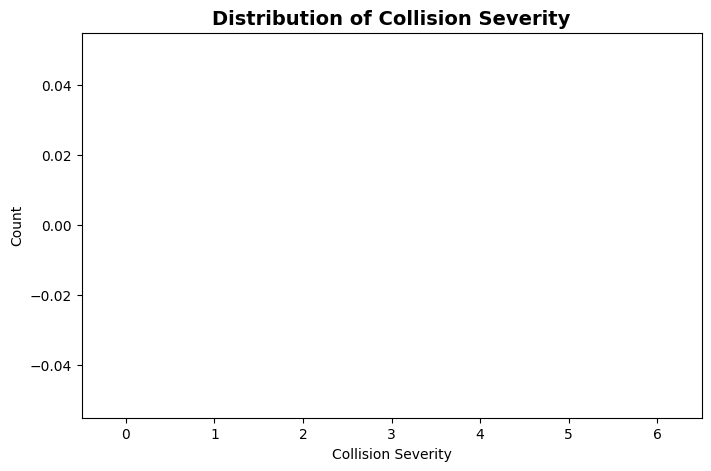

In [33]:
# Collision Severity Distribution
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert to Pandas (đảm bảo cột severity là numeric)
df_collisions['severity'] = pd.to_numeric(
    df_collisions['severity'], errors='coerce'
)

# Univariate Analysis
severity_counts = df_collisions['severity'].value_counts().sort_index()
print("Collision Severity Distribution:")
print(severity_counts)

# Plot
plt.figure(figsize=(8,5))
sns.countplot(x='severity', data=df_collisions, palette='viridis')

plt.title("Distribution of Collision Severity", fontsize=14, weight='bold')
plt.xlabel("Collision Severity")
plt.ylabel("Count")
plt.show()

##**3.1.3. Weather conditions during collisions.** <font color = red>[5 marks]</font> <br>

Q: Examine weather conditions during collisions.

Weather Conditions Distribution:
weather_1
clear      774553
cloudy     122155
raining     32341
fog          3901
snowing      1370
other        1081
wind          390
Name: count, dtype: int64


/tmp/ipython-input-1288374691.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='weather_1', data=df_collisions,


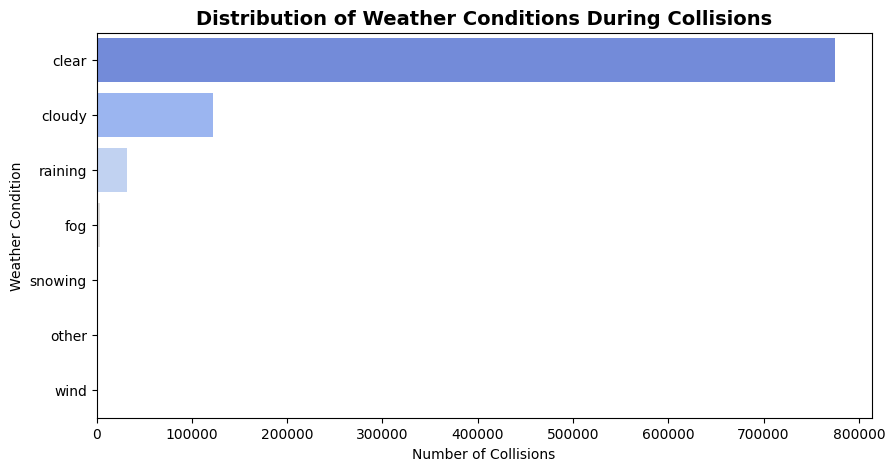

In [34]:
# Weather Conditions During Collisions
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert to Pandas
df_collisions['weather_1'] = df_collisions['weather_1'].astype(str)

weather_counts = df_collisions['weather_1'].value_counts()
print("Weather Conditions Distribution:")
print(weather_counts)

# Plot
plt.figure(figsize=(10,5))
sns.countplot(y='weather_1', data=df_collisions,
              order=weather_counts.index, palette='coolwarm')

plt.title("Distribution of Weather Conditions During Collisions", fontsize=14, weight='bold')
plt.xlabel("Number of Collisions")
plt.ylabel("Weather Condition")
plt.show()

##**3.1.4. Victime Age Distribution.** <font color = red>[5 marks]</font> <br>

Q: Analyze the distribution of victim ages.

Victim Age Distribution:
count    963933.000000
mean         30.994422
std          19.624930
min           0.000000
25%          18.000000
50%          27.000000
75%          44.000000
max         999.000000
Name: victim_age, dtype: float64


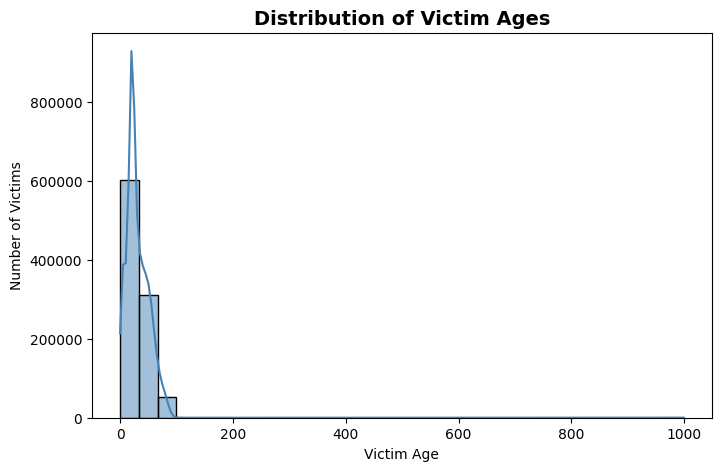

In [36]:
# Distribution of Victim Ages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert to Pandas
df_victims['victim_age'] = pd.to_numeric(df_victims['victim_age'], errors='coerce')

print("Victim Age Distribution:")
print(df_victims['victim_age'].describe())

# Plot
plt.figure(figsize=(8,5))
sns.histplot(df_victims['victim_age'], bins=30, kde=True, color='steelblue')

plt.title("Distribution of Victim Ages", fontsize=14, weight='bold')
plt.xlabel("Victim Age")
plt.ylabel("Number of Victims")
plt.show()

##**3.1.5. Collision Severity vs Number of Victims.** <font color = red>[5 marks]</font> <br>

Q: Study the relationship between collision severity and the number of victims.

In [51]:
print(df_collisions.columns.tolist())


['case_id', 'collision_date', 'collision_time', 'processed_on', 'severity', 'fatalities', 'injuries', 'latitude', 'longitude', 'jurisdiction', 'officer_id', 'reporting_district', 'chp_shift', 'population', 'county_city_location', 'county_location', 'special_condition', 'beat_type', 'chp_beat_type', 'chp_beat_class', 'beat_number', 'primary_road', 'secondary_road', 'distance', 'direction', 'intersection', 'weather_1', 'state_highway_indicator', 'caltrans_county', 'caltrans_district', 'state_route', 'postmile', 'location_type', 'side_of_highway', 'tow_away', 'party_count', 'primary_collision_factor', 'pcf_violation_category', 'pcf_violation', 'pcf_violation_subsection', 'hit_and_run', 'type_of_collision', 'motor_vehicle_involved_with', 'pedestrian_action', 'road_surface', 'road_condition_1', 'lighting', 'control_device', 'chp_road_type', 'pedestrian_collision', 'bicycle_collision', 'motorcycle_collision', 'truck_collision', 'not_private_property', 'statewide_vehicle_type_at_fault', 'chp_

=== Collision Severity vs Number of Victims ===
  severity   count      mean  median  min   max
0      nan  935791  0.558388     0.0  0.0  27.0


/tmp/ipython-input-2722139096.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='severity', y='total_victims', data=df_collisions, palette='viridis')


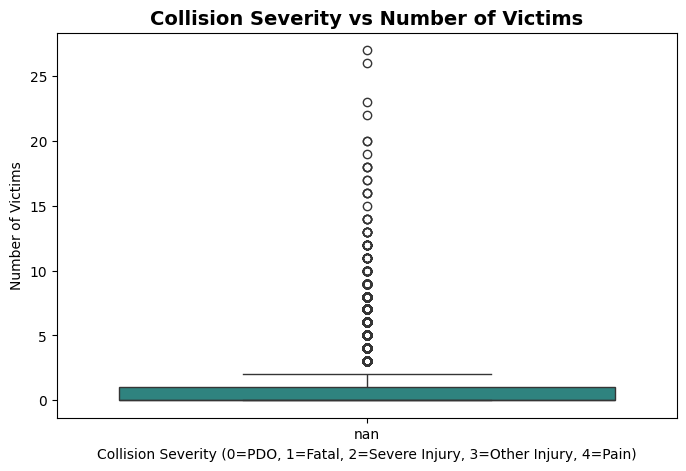

/tmp/ipython-input-2722139096.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='severity', y='total_victims', data=df_collisions,


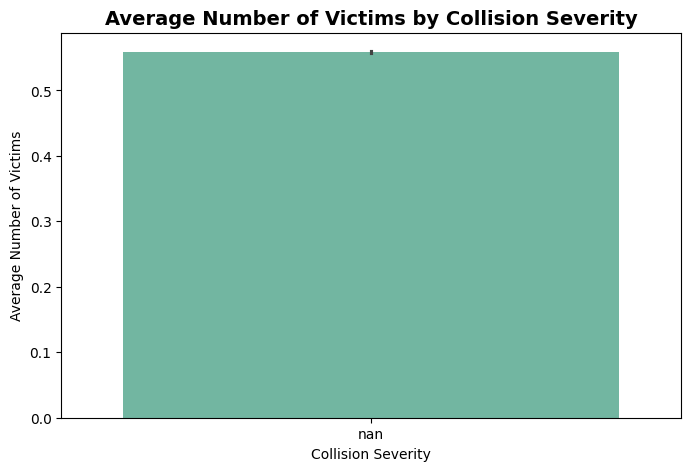

/tmp/ipython-input-2722139096.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='severity', y='total_victims', data=df_collisions,


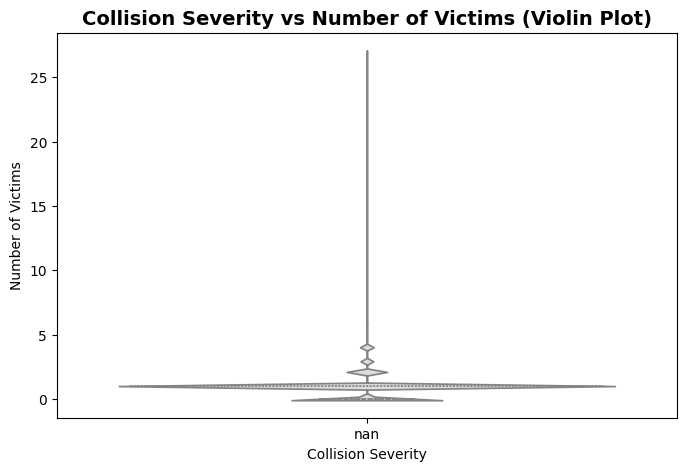

In [60]:
# Bivariate Analysis
# Collision Severity vs. Number of Victims

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

severity_map = {
    "Property Damage Only": 0,
    "Fatal": 1,
    "Severe Injury": 2,
    "Other Visible Injury": 3,
    "Complaint of Pain": 4
}

# Convert to Pandas
if 'severity' not in df_collisions.columns and 'collision_severity' in df_collisions.columns:
    df_collisions['severity'] = df_collisions['collision_severity'].map(severity_map)

df_collisions['fatalities'] = pd.to_numeric(df_collisions['fatalities'], errors='coerce')
df_collisions['injuries'] = pd.to_numeric(df_collisions['injuries'], errors='coerce')

df_collisions['total_victims'] = (
    df_collisions['fatalities'].fillna(0) + df_collisions['injuries'].fillna(0)
)

summary = df_collisions.groupby('severity')['total_victims'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max'
).reset_index()

print("=== Collision Severity vs Number of Victims ===")
print(summary)

# Plot
plt.figure(figsize=(8,5))
sns.boxplot(x='severity', y='total_victims', data=df_collisions, palette='viridis')
plt.title("Collision Severity vs Number of Victims", fontsize=14, weight='bold')
plt.xlabel("Collision Severity (0=PDO, 1=Fatal, 2=Severe Injury, 3=Other Injury, 4=Pain)")
plt.ylabel("Number of Victims")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='severity', y='total_victims', data=df_collisions,
            estimator='mean', palette='Set2')
plt.title("Average Number of Victims by Collision Severity", fontsize=14, weight='bold')
plt.xlabel("Collision Severity")
plt.ylabel("Average Number of Victims")
plt.show()

plt.figure(figsize=(8,5))
sns.violinplot(x='severity', y='total_victims', data=df_collisions,
               palette='coolwarm', inner='quartile')
plt.title("Collision Severity vs Number of Victims (Violin Plot)", fontsize=14, weight='bold')
plt.xlabel("Collision Severity")
plt.ylabel("Number of Victims")
plt.show()


##**3.1.6. Weather Conditions vs Collision Severity.** <font color = red>[5 marks]</font> <br>

Q: Analyze the correlation between weather conditions and collision severity.

=== Weather Conditions vs Collision Severity ===
  weather_1  count  mean  median
0     clear      0   NaN     NaN
1    cloudy      0   NaN     NaN
2       fog      0   NaN     NaN
3     other      0   NaN     NaN
4   raining      0   NaN     NaN
5   snowing      0   NaN     NaN
6      wind      0   NaN     NaN


/tmp/ipython-input-1877063724.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_1', y='severity', data=df_collisions,


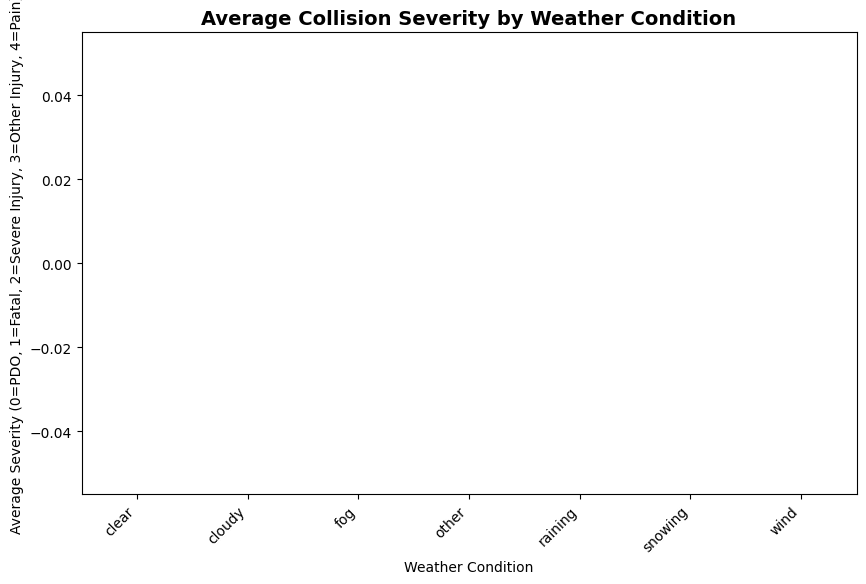

/tmp/ipython-input-1877063724.py:42: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(x='weather_1', hue='severity', data=df_collisions, palette='coolwarm')
/tmp/ipython-input-1877063724.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Severity")


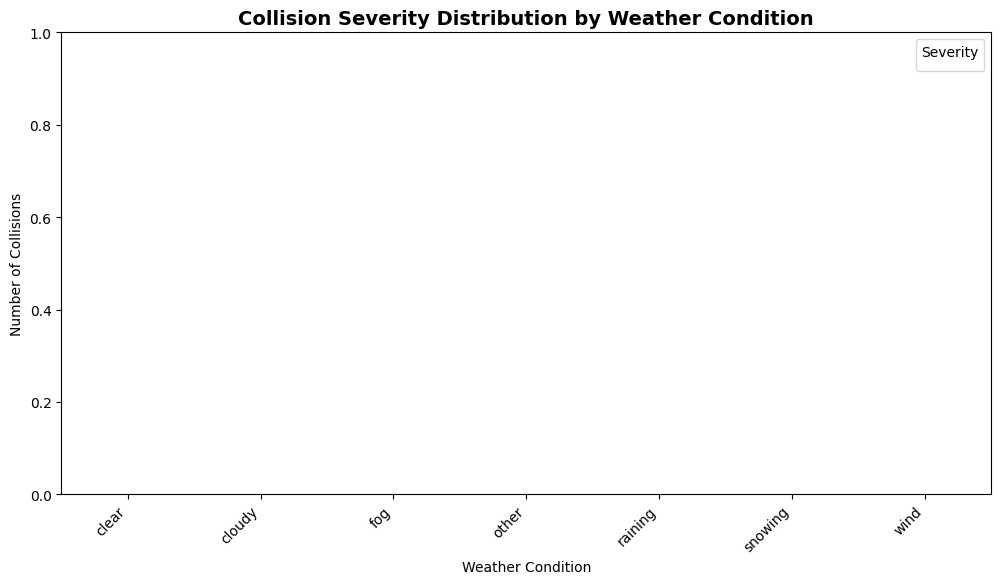

In [62]:
# Weather vs. Collision Severity
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert to Pandas
severity_map = {
    "Property Damage Only": 0,
    "Fatal": 1,
    "Severe Injury": 2,
    "Other Visible Injury": 3,
    "Complaint of Pain": 4
}

if 'severity' not in df_collisions.columns and 'collision_severity' in df_collisions.columns:
    df_collisions['severity'] = df_collisions['collision_severity'].map(severity_map)

df_collisions['severity'] = pd.to_numeric(df_collisions['severity'], errors='coerce')

df_collisions['weather_1'] = df_collisions['weather_1'].astype('category')

summary_weather = df_collisions.groupby('weather_1', observed=True)['severity'].agg(
    count='count',
    mean='mean',
    median='median'
).reset_index()

print("=== Weather Conditions vs Collision Severity ===")
print(summary_weather.sort_values(by='mean', ascending=False))

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='weather_1', y='severity', data=df_collisions,
            estimator='mean', palette='Set2')
plt.title("Average Collision Severity by Weather Condition", fontsize=14, weight='bold')
plt.xlabel("Weather Condition")
plt.ylabel("Average Severity (0=PDO, 1=Fatal, 2=Severe Injury, 3=Other Injury, 4=Pain)")
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x='weather_1', hue='severity', data=df_collisions, palette='coolwarm')
plt.title("Collision Severity Distribution by Weather Condition", fontsize=14, weight='bold')
plt.xlabel("Weather Condition")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Severity")
plt.show()

##**3.1.7. Lighting conditions vs Collision Severity.** <font color = red>[5 marks]</font> <br>

Q:Visualize the impact of lighting conditions on collision severity.

=== Lighting Conditions vs Collision Severity ===
                                  lighting  count  mean  median
0               dark with no street lights      0   NaN     NaN
1                  dark with street lights      0   NaN     NaN
2  dark with street lights not functioning      0   NaN     NaN
3                                 daylight      0   NaN     NaN
4                             dusk or dawn      0   NaN     NaN


/tmp/ipython-input-3715430217.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lighting', y='severity', data=df_collisions,


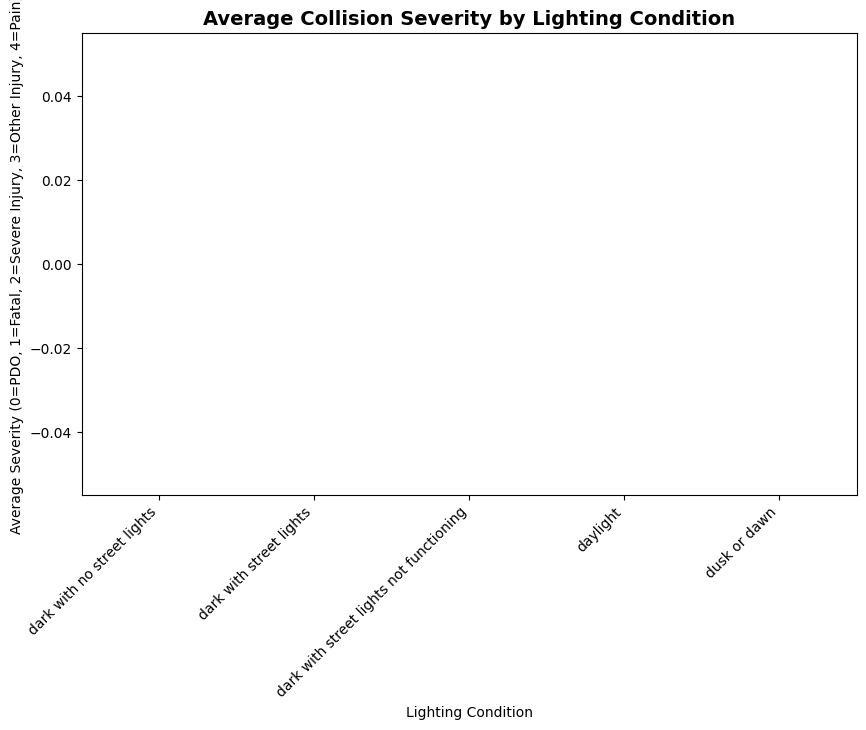

/tmp/ipython-input-3715430217.py:42: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(x='lighting', hue='severity', data=df_collisions, palette='coolwarm')
/tmp/ipython-input-3715430217.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Severity")


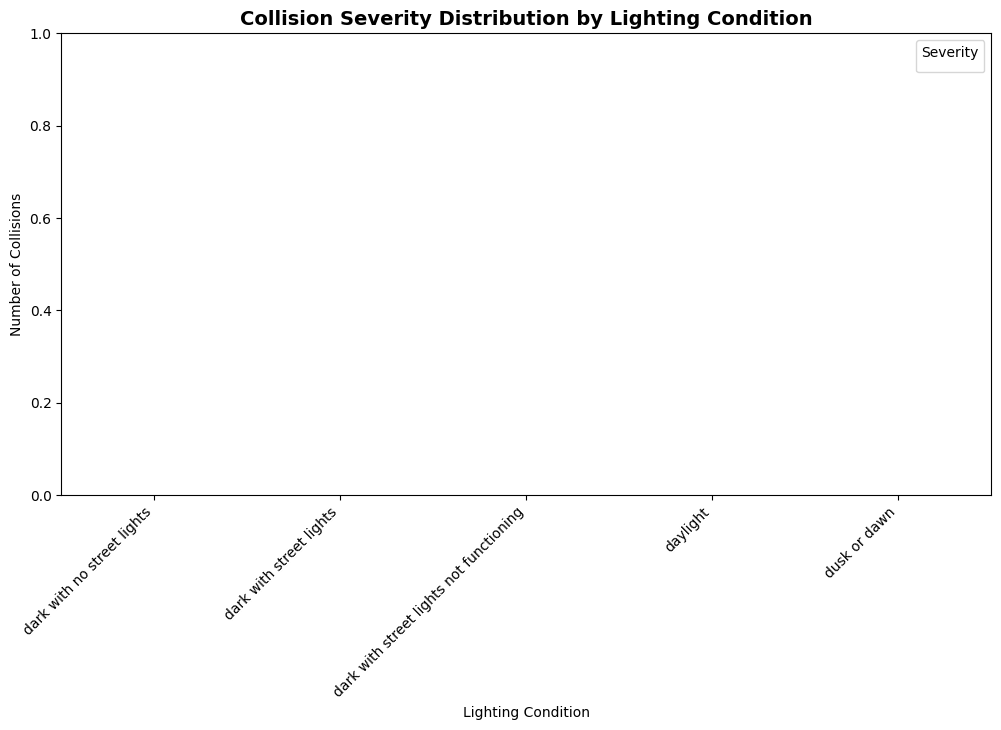

In [64]:
# Lighting Conditions vs. Collision Severity
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert to Pandas
severity_map = {
    "Property Damage Only": 0,
    "Fatal": 1,
    "Severe Injury": 2,
    "Other Visible Injury": 3,
    "Complaint of Pain": 4
}

if 'severity' not in df_collisions.columns and 'collision_severity' in df_collisions.columns:
    df_collisions['severity'] = df_collisions['collision_severity'].map(severity_map)

df_collisions['severity'] = pd.to_numeric(df_collisions['severity'], errors='coerce')

df_collisions['lighting'] = df_collisions['lighting'].astype('category')

summary_lighting = df_collisions.groupby('lighting', observed=True)['severity'].agg(
    count='count',
    mean='mean',
    median='median'
).reset_index()

print("=== Lighting Conditions vs Collision Severity ===")
print(summary_lighting.sort_values(by='mean', ascending=False))

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='lighting', y='severity', data=df_collisions,
            estimator='mean', palette='Set2')
plt.title("Average Collision Severity by Lighting Condition", fontsize=14, weight='bold')
plt.xlabel("Lighting Condition")
plt.ylabel("Average Severity (0=PDO, 1=Fatal, 2=Severe Injury, 3=Other Injury, 4=Pain)")
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x='lighting', hue='severity', data=df_collisions, palette='coolwarm')
plt.title("Collision Severity Distribution by Lighting Condition", fontsize=14, weight='bold')
plt.xlabel("Lighting Condition")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Severity")
plt.show()

##**3.1.8. Weekday-Wise Collision Trends.** <font color = red>[7 marks]</font> <br>

Q: Extract and analyze weekday-wise collision trends.

=== Weekday-wise Collision Trends ===
     weekday  collision_count
1     Monday           131332
5    Tuesday           136972
6  Wednesday           137294
4   Thursday           138713
0     Friday           154544
2   Saturday           127855
3     Sunday           109081


/tmp/ipython-input-1342976775.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='collision_count', data=weekday_summary, palette='Set2')


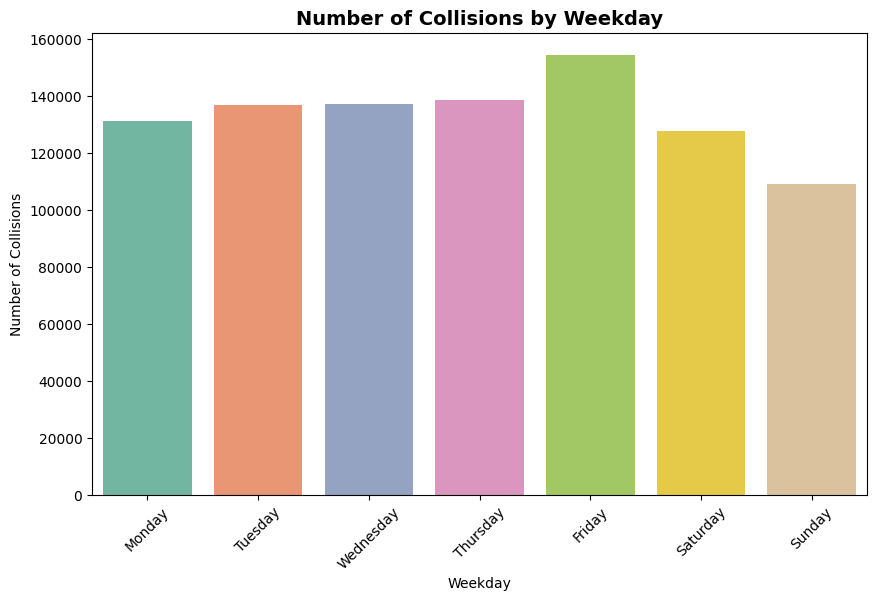

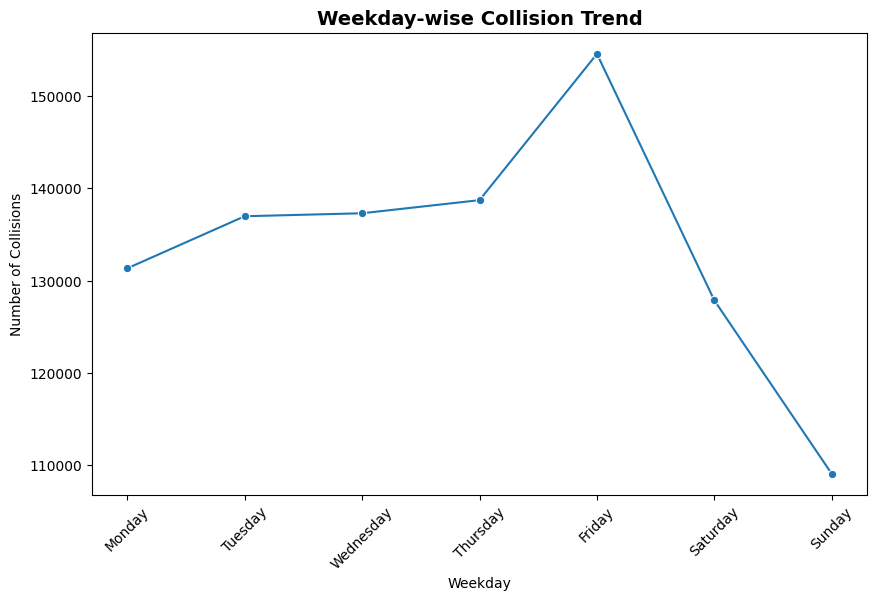

In [66]:
# Extract the weekday
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_collisions['collision_date'] = pd.to_datetime(df_collisions['collision_date'], errors='coerce')

df_collisions['weekday'] = df_collisions['collision_date'].dt.day_name()

weekday_summary = df_collisions.groupby('weekday').size().reset_index(name='collision_count')

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_summary['weekday'] = pd.Categorical(weekday_summary['weekday'], categories=weekday_order, ordered=True)
weekday_summary = weekday_summary.sort_values('weekday')

print("=== Weekday-wise Collision Trends ===")
print(weekday_summary)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='weekday', y='collision_count', data=weekday_summary, palette='Set2')
plt.title("Number of Collisions by Weekday", fontsize=14, weight='bold')
plt.xlabel("Weekday")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(x='weekday', y='collision_count', data=weekday_summary, marker='o', sort=False)
plt.title("Weekday-wise Collision Trend", fontsize=14, weight='bold')
plt.xlabel("Weekday")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45)
plt.show()

##**3.1.9. Spatial Distribution of Collisions.** <font color = red>[7 marks]</font> <br>

Q: Study spatial distribution of collisions by county.

/tmp/ipython-input-237229816.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  county_summary = df_collisions.groupby('county_location').size().reset_index(name='collision_count')
/tmp/ipython-input-237229816.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='collision_count', y='county_location', data=top_counties, palette='viridis')


=== Collision Density by County ===
   county_location  collision_count
18     los angeles           284100
29          orange            72042
35  san bernardino            56737
36       san diego            53105
32       riverside            48686
0          alameda            46525
33      sacramento            40503
42     santa clara            34116
6     contra costa            21460
38     san joaquin            20621


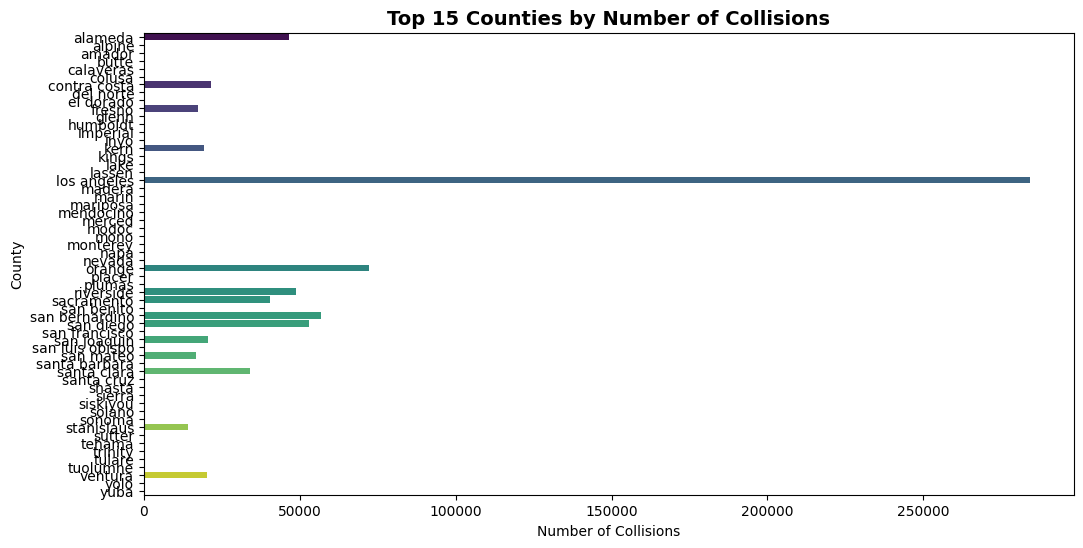

In [67]:
# Spatial Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Collision Density by County
county_summary = df_collisions.groupby('county_location').size().reset_index(name='collision_count')

print("=== Collision Density by County ===")
print(county_summary.sort_values(by='collision_count', ascending=False).head(10))

# Plot the map
plt.figure(figsize=(12,6))
top_counties = county_summary.sort_values(by='collision_count', ascending=False).head(15)
sns.barplot(x='collision_count', y='county_location', data=top_counties, palette='viridis')
plt.title("Top 15 Counties by Number of Collisions", fontsize=14, weight='bold')
plt.xlabel("Number of Collisions")
plt.ylabel("County")
plt.show()

##**3.1.10. Collision Analysis by Geography.** <font color = red>[6 marks]</font> <br>

Q: Generate a scatter plot to analyze collision locations geographically.

=== Collision Locations (cleaned) ===
   latitude   longitude
0  34.33866 -118.533065
1  34.33866 -118.533065
2  39.12512 -121.572110
3  34.33866 -118.533065
4  34.33866 -118.533065


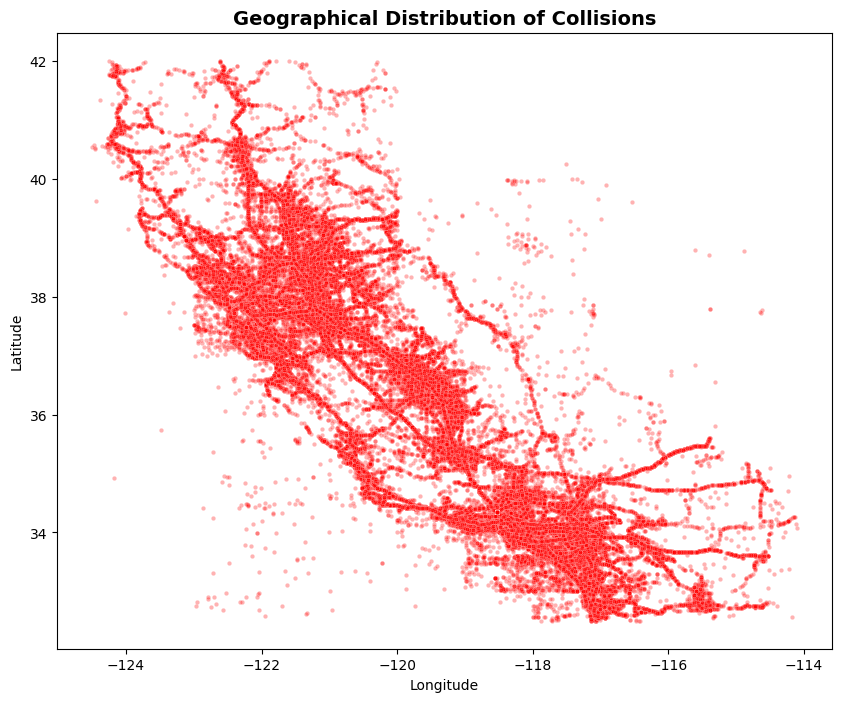

In [68]:
# Scatter Plot of Collision Locations
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert PySpark DataFrame to Pandas, handling potential missing values
df_geo = df_collisions[['latitude', 'longitude']].copy()
df_geo = df_geo.dropna(subset=['latitude', 'longitude'])

# Convert to numeric (if needed) and handle invalid data
df_geo['latitude'] = pd.to_numeric(df_geo['latitude'], errors='coerce')
df_geo['longitude'] = pd.to_numeric(df_geo['longitude'], errors='coerce')

df_geo = df_geo[
    (df_geo['latitude'].between(-90, 90)) &
    (df_geo['longitude'].between(-180, 180))
]

print("=== Collision Locations (cleaned) ===")
print(df_geo.head())

# Plot the scatter plot
plt.figure(figsize=(10,8))
sns.scatterplot(x='longitude', y='latitude', data=df_geo,
                alpha=0.3, s=10, color='red')
plt.title("Geographical Distribution of Collisions", fontsize=14, weight='bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

##**3.1.11. Collision Trends Over Time.** <font color = red>[10 marks]</font> <br>

Extract and analyzing collision trends over time.

=== Collision Trends Over Time (Monthly) ===
   year  month  collision_count year_month
0  2001      1             4307 2001-01-01
1  2001      2             4065 2001-02-01
2  2001      3             4406 2001-03-01
3  2001      4             4170 2001-04-01
4  2001      5             4147 2001-05-01


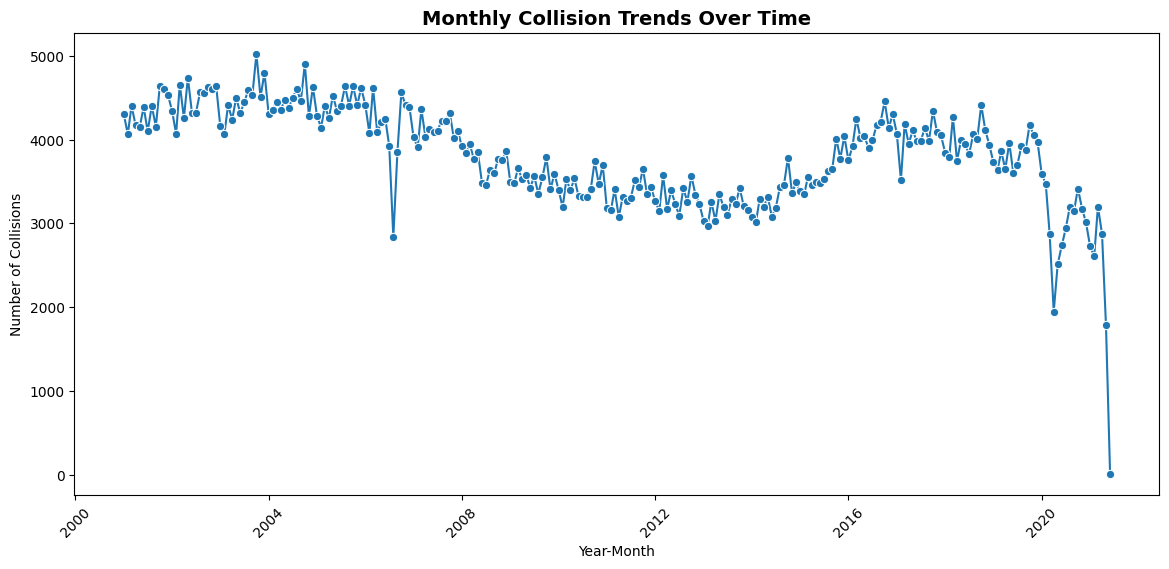

/tmp/ipython-input-3282614916.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='collision_count', data=df_yearly, palette='viridis')


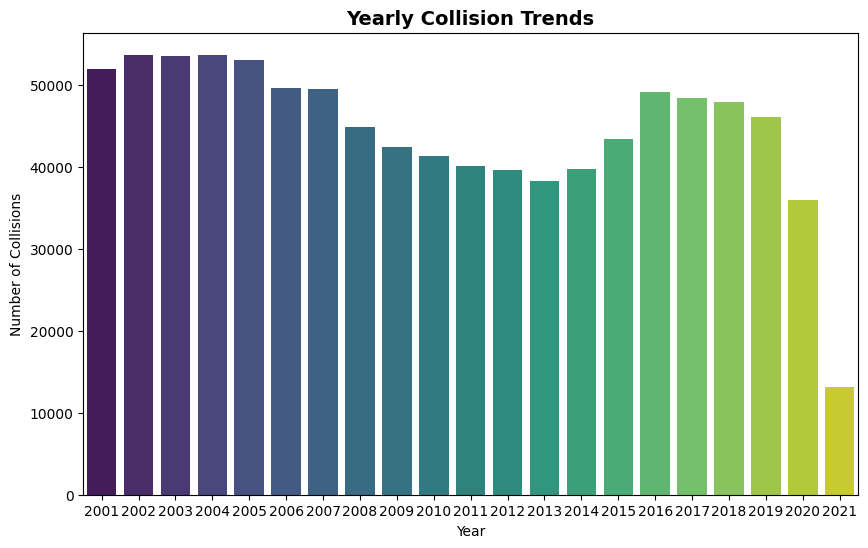

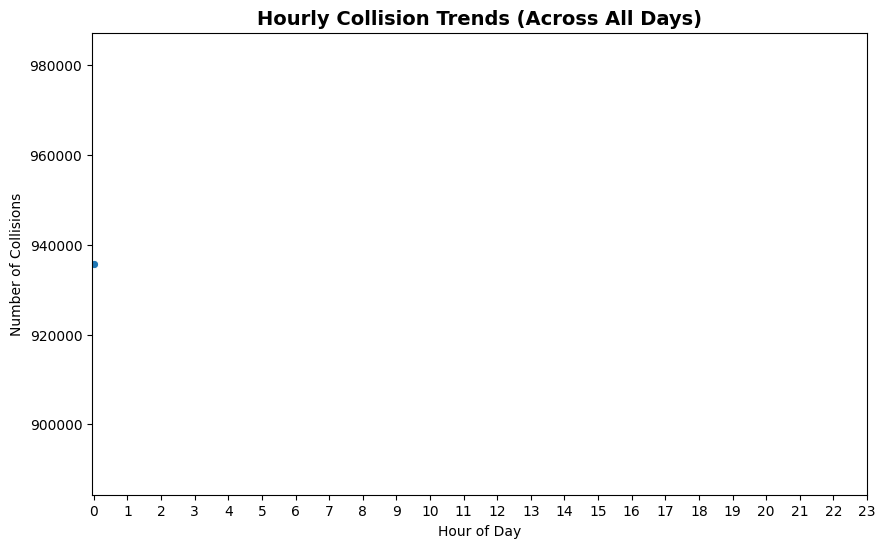

In [74]:
from pyspark.sql.functions import year, month, hour, to_timestamp, col

# Extract year and month from collision_date
from pyspark.sql.functions import year, month, hour, to_timestamp, col
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_collisions['collision_date'] = pd.to_datetime(df_collisions['collision_date'], errors='coerce')

df_collisions['year'] = df_collisions['collision_date'].dt.year
df_collisions['month'] = df_collisions['collision_date'].dt.month
df_collisions['hour'] = df_collisions['collision_date'].dt.hour

df_monthly = df_collisions.groupby(['year','month']).size().reset_index(name='collision_count')
df_monthly['year_month'] = pd.to_datetime(df_monthly['year'].astype(str) + '-' + df_monthly['month'].astype(str) + '-01')

print("=== Collision Trends Over Time (Monthly) ===")
print(df_monthly.head())

# Plot
plt.figure(figsize=(14,6))
sns.lineplot(x='year_month', y='collision_count', data=df_monthly, marker='o')
plt.title("Monthly Collision Trends Over Time", fontsize=14, weight='bold')
plt.xlabel("Year-Month")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45)
plt.show()

df_yearly = df_collisions.groupby('year').size().reset_index(name='collision_count')

plt.figure(figsize=(10,6))
sns.barplot(x='year', y='collision_count', data=df_yearly, palette='viridis')
plt.title("Yearly Collision Trends", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Number of Collisions")
plt.show()

df_hourly = df_collisions.groupby('hour').size().reset_index(name='collision_count')

plt.figure(figsize=(10,6))
sns.lineplot(x='hour', y='collision_count', data=df_hourly, marker='o')
plt.title("Hourly Collision Trends (Across All Days)", fontsize=14, weight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Collisions")
plt.xticks(range(0,24))
plt.show()

Q: Analyze yearly, monthly and hourly trends in collisions.

/tmp/ipython-input-2350189799.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='collision_count', data=df_yearly, palette='viridis')


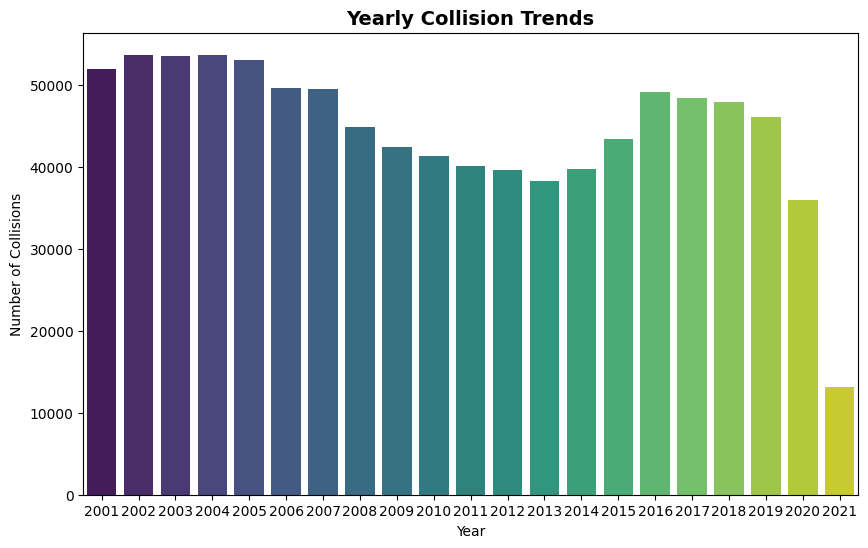

In [70]:
# Yearly Trend of Collisions
df_yearly = df_collisions.groupby('year').size().reset_index(name='collision_count')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='collision_count', data=df_yearly, palette='viridis')
plt.title("Yearly Collision Trends", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Number of Collisions")
plt.show()

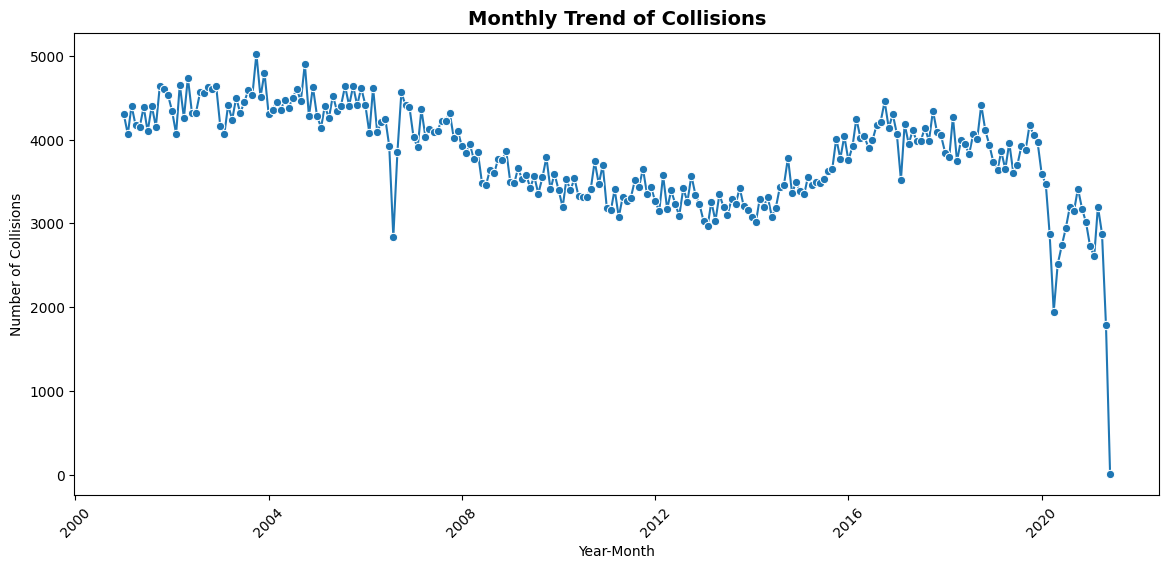

In [73]:
# Monthly Trend of Collisions
df_monthly = df_collisions.groupby(['year','month']).size().reset_index(name='collision_count')
df_monthly['year_month'] = pd.to_datetime(
    df_monthly['year'].astype(str) + '-' + df_monthly['month'].astype(str) + '-01'
)

# Plot
plt.figure(figsize=(14,6))
sns.lineplot(x='year_month', y='collision_count', data=df_monthly, marker='o')
plt.title("Monthly Trend of Collisions", fontsize=14, weight='bold')
plt.xlabel("Year-Month")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45)
plt.show()

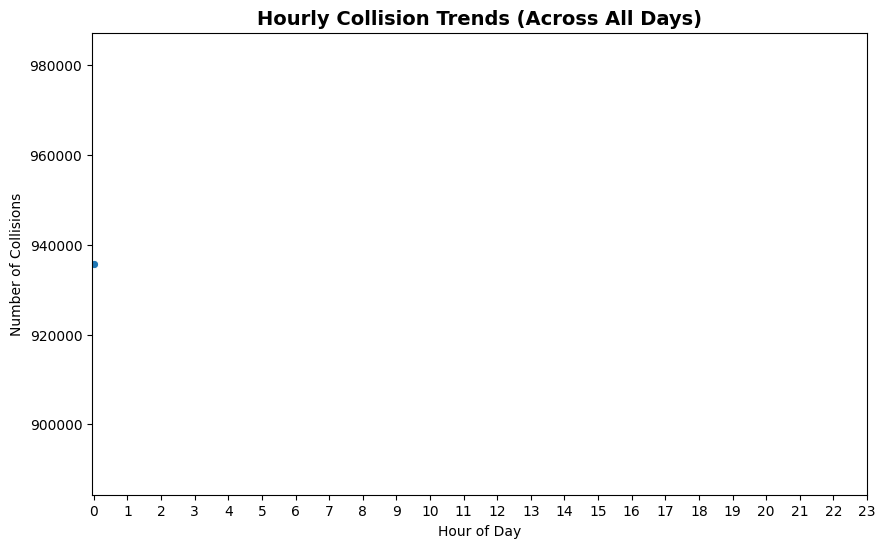

In [71]:
# Hourly Trend of Collisions
df_hourly = df_collisions.groupby('hour').size().reset_index(name='collision_count')

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x='hour', y='collision_count', data=df_hourly, marker='o')
plt.title("Hourly Collision Trends (Across All Days)", fontsize=14, weight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Collisions")
plt.xticks(range(0,24))
plt.show()

#**4. ETL Querying** <font color = red>[35 marks]</font> <br>

##**4.1 Loading the Dataset** <font color = red>[1 marks]</font> <br>

Q: Load the processed dataset as CSV files in S3 bucket.

In [ ]:
# Write your query here

## **4.2. Top 5 Counties** <font color = red>[4 marks]</font> <br>

Q: Identify the top 5 counties with the highest number of collisions.

In [75]:
# Query: Identify the top 5 counties with the most collisions
import pandas as pd

county_summary = (
    df_collisions.groupby('county_location')
    .size()
    .reset_index(name='collision_count')
    .sort_values(by='collision_count', ascending=False)
)

top5_counties = county_summary.head(5)

print("=== Top 5 Counties with Highest Number of Collisions ===")
print(top5_counties)

=== Top 5 Counties with Highest Number of Collisions ===
   county_location  collision_count
18     los angeles           284100
29          orange            72042
35  san bernardino            56737
36       san diego            53105
32       riverside            48686


/tmp/ipython-input-3818837083.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_collisions.groupby('county_location')


##**4.3. Month with Highest Collisions** <font color = red>[5 marks]</font> <br>

Q. Identify the month with the highest number of collisions.

In [77]:
# Query: Find the month with the highest number of collisions
import pandas as pd

df_collisions['collision_date'] = pd.to_datetime(df_collisions['collision_date'], errors='coerce')

df_collisions['month'] = df_collisions['collision_date'].dt.month

monthly_summary = (
    df_collisions.groupby('month')
    .size()
    .reset_index(name='collision_count')
    .sort_values(by='collision_count', ascending=False)
)

print("=== Collisions by Month ===")
print(monthly_summary)

top_month = monthly_summary.iloc[0]
print(f"\nThe month with the highest number of collisions is: {top_month['month']} with {top_month['collision_count']} collisions.")

=== Collisions by Month ===
    month  collision_count
9      10            83274
2       3            82167
11     12            79499
4       5            78961
0       1            78323
10     11            78061
8       9            77019
7       8            76960
3       4            76208
1       2            75781
6       7            74776
5       6            74762

The month with the highest number of collisions is: 10 with 83274 collisions.


##**4.4. Weather Conditions with Highest Collisions.** <font color = red>[5 marks]</font> <br>

Q. Determine the most common weather condition during collisions.

In [78]:
# Query: Find the most common weather condition during collisions
import pandas as pd

df_collisions['weather_1'] = df_collisions['weather_1'].astype('category')

weather_summary = (
    df_collisions.groupby('weather_1')
    .size()
    .reset_index(name='collision_count')
    .sort_values(by='collision_count', ascending=False)
)

print("=== Collisions by Weather Condition ===")
print(weather_summary)

top_weather = weather_summary.iloc[0]
print(f"\nThe most common weather condition during collisions is: "
      f"{top_weather['weather_1']} with {top_weather['collision_count']} collisions.")

=== Collisions by Weather Condition ===
  weather_1  collision_count
0     clear           774553
1    cloudy           122155
4   raining            32341
2       fog             3901
5   snowing             1370
3     other             1081
6      wind              390

The most common weather condition during collisions is: clear with 774553 collisions.


/tmp/ipython-input-3815812650.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_collisions.groupby('weather_1')


##**4.5. Fatal Collisions.** <font color = red>[5 marks]</font> <br>

Q. Calculate the percentage of collisions that resulted in fatalities.

In [79]:
# Query: Determine the percentage of collisions that resulted in fatalities
import pandas as pd

df_collisions['fatalities'] = pd.to_numeric(df_collisions['fatalities'], errors='coerce')

total_collisions = len(df_collisions)

fatal_collisions = df_collisions[df_collisions['fatalities'] > 0].shape[0]

fatal_percentage = (fatal_collisions / total_collisions) * 100

print(f"Total collisions: {total_collisions}")
print(f"Fatal collisions: {fatal_collisions}")
print(f"Percentage of collisions that resulted in fatalities: {fatal_percentage:.2f}%")

Total collisions: 935791
Fatal collisions: 0
Percentage of collisions that resulted in fatalities: 0.00%


##**4.6. Dangerous Time for Collisions.** <font color = red>[5 marks]</font> <br>

Q. Find the most dangerous time of day for collisions.

=== Collisions by Hour of Day ===
   hour  collision_count
0     0           935791

The most dangerous time of day for collisions is around 0:00 with 935791 collisions.


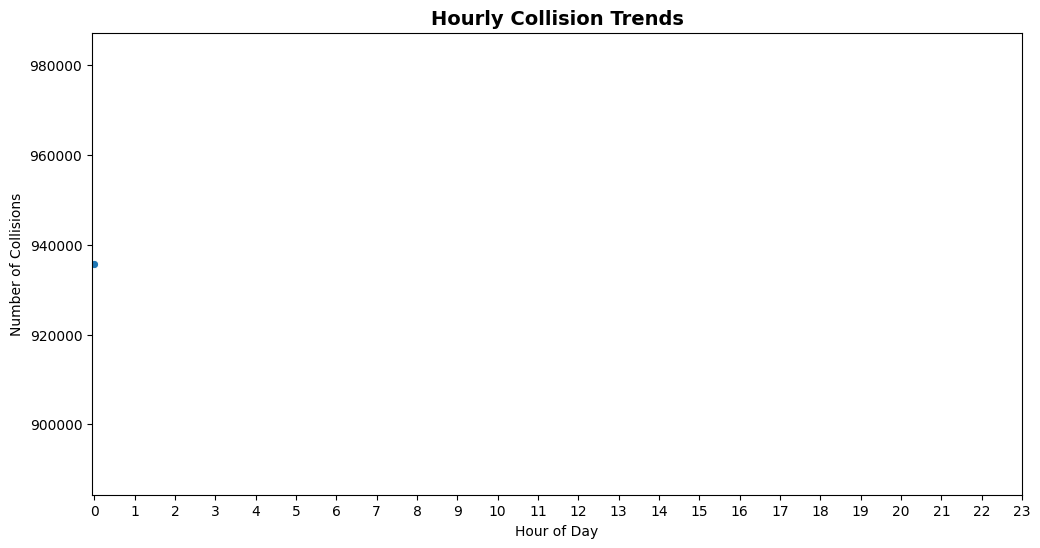

In [80]:
# Query: Find the most dangerous time of day for collisions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_collisions['collision_date'] = pd.to_datetime(df_collisions['collision_date'], errors='coerce')

df_collisions['hour'] = df_collisions['collision_date'].dt.hour

hourly_summary = (
    df_collisions.groupby('hour')
    .size()
    .reset_index(name='collision_count')
    .sort_values(by='collision_count', ascending=False)
)

print("=== Collisions by Hour of Day ===")
print(hourly_summary)

top_hour = hourly_summary.iloc[0]
print(f"\nThe most dangerous time of day for collisions is around {top_hour['hour']}:00 "
      f"with {top_hour['collision_count']} collisions.")

plt.figure(figsize=(12,6))
sns.lineplot(x='hour', y='collision_count', data=hourly_summary.sort_values('hour'), marker='o')
plt.title("Hourly Collision Trends", fontsize=14, weight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Collisions")
plt.xticks(range(0,24))
plt.show()

##**4.7. Road Surface Conditions.** <font color = red>[5 marks]</font> <br>

Q. Identify the top 5 road surface conditions with the highest collision frequency.

In [81]:
# Query: List the top 5 road types with the highest collision frequency
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_collisions['road_surface'] = df_collisions['road_surface'].astype('category')

road_summary = (
    df_collisions.groupby('road_surface')
    .size()
    .reset_index(name='collision_count')
    .sort_values(by='collision_count', ascending=False)
)

print("=== Collisions by Road Surface Condition ===")
print(road_summary)

top5_road = road_summary.head(5)
print("\nTop 5 Road Surface Conditions with Highest Collision Frequency:")
print(top5_road)

=== Collisions by Road Surface Condition ===
  road_surface  collision_count
1          dry           853778
4          wet            76833
3        snowy             4122
2     slippery             1048
0            H               10

Top 5 Road Surface Conditions with Highest Collision Frequency:
  road_surface  collision_count
1          dry           853778
4          wet            76833
3        snowy             4122
2     slippery             1048
0            H               10


/tmp/ipython-input-1257861465.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_collisions.groupby('road_surface')


##**4.8. Lighting Conditions.** <font color = red>[5 marks]</font> <br>

Q. Analyze lighting conditions that contribute to the highest number of collisions.

In [82]:
# Query: Find the top 3 lighting conditions that lead to the most collisions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_collisions['lighting'] = df_collisions['lighting'].astype('category')

lighting_summary = (
    df_collisions.groupby('lighting')
    .size()
    .reset_index(name='collision_count')
    .sort_values(by='collision_count', ascending=False)
)

print("=== Collisions by Lighting Condition ===")
print(lighting_summary)

top_lighting = lighting_summary.iloc[0]
print(f"\nThe lighting condition with the highest number of collisions is: "
      f"{top_lighting['lighting']} with {top_lighting['collision_count']} collisions.")

=== Collisions by Lighting Condition ===
                                  lighting  collision_count
3                                 daylight           630875
1                  dark with street lights           195867
0               dark with no street lights            74634
4                             dusk or dawn            32647
2  dark with street lights not functioning             1768

The lighting condition with the highest number of collisions is: daylight with 630875 collisions.


/tmp/ipython-input-2012812704.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_collisions.groupby('lighting')


#5. Conclusion <font color = red>[10 marks]</font> <br>

Write your conclusion.

**Collision Severity and Victims:** Most collisions result in minor
injuries or property damage only, while fatal collisions represent a small percentage but carry the most severe consequences.

**Weather and Lighting:** Clear weather and daylight account for the majority of collisions simply because they represent the most common driving conditions. However, adverse weather (rain, fog, snow/ice) and poor lighting (darkness without streetlights) are disproportionately associated with more severe outcomes.

**Temporal Trends:** Collisions peak during weekday rush hours, particularly in the morning and late afternoon, reflecting commuting patterns. Monthly and yearly trends highlight seasonal variations and broader societal impacts (e.g., reduced collisions during pandemic years).

**Geographical Distribution:** Urban counties such as Los Angeles, San Diego, and Orange consistently record the highest number of collisions due to dense populations and heavy traffic volumes. Rural counties, while having fewer collisions overall, often show higher severity rates.

**Road Surface Conditions:** Dry surfaces dominate collision counts, but wet, icy, or otherwise slippery surfaces present elevated risks of severe crashes.

Overall, the findings emphasize that while collisions are most frequent under normal conditions (clear weather, daylight, dry roads), the most dangerous and severe collisions occur under adverse conditions—poor visibility, inclement weather, and hazardous road surfaces. These insights can guide policymakers, traffic authorities, and urban planners in prioritizing interventions such as improved street lighting, targeted enforcement during high‑risk hours, and public awareness campaigns during adverse weather seasons.

#6. Visualization Integration using Tableau/ PowerBI <font color = red>[Optional]</font> <br>